In [8]:
!pip install intellikit -q
import intellikit as ik
import pandas as pd
import numpy as np
import re

# CBR

In [2]:
data = pd.read_csv("mobile phone price prediction.csv")
data.head()

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,"9,999",Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
1,1,Samsung Galaxy A11,4.20,63,"Dual Sim, 3G, 4G, VoLTE,",2 GB RAM,4000 mAh Battery,6.4 inches,13 MP + 5 MP + 2 MP Triple Rear &amp; 8 MP Fro...,"Memory Card Supported, upto 512 GB",10,"9,990",Samsung,32 GB inbuilt,15W Fast Charging,720 x 1560 px Display with Punch Hole,1.8 GHz Processor,Octa Core
2,2,Samsung Galaxy A13,4.30,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP Quad Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2408 px Display with Water Drop Notch,2 GHz Processor,Octa Core
3,3,Samsung Galaxy F23,4.10,73,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,6000 mAh Battery,6.4 inches,48 MP Quad Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",12,"11,999",Samsung,64 GB inbuilt,NaN,720 x 1600 px,Octa Core,Helio G88
4,4,Samsung Galaxy A03s (4GB RAM + 64GB),4.10,69,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.5 inches,13 MP + 2 MP + 2 MP Triple Rear &amp; 5 MP Fro...,"Memory Card Supported, upto 1 TB",11,"11,999",Samsung,64 GB inbuilt,15W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio P35


In [3]:
data.columns

Index(['Unnamed: 0', 'Name', 'Rating', 'Spec_score', 'No_of_sim', 'Ram',
       'Battery', 'Display', 'Camera', 'External_Memory', 'Android_version',
       'Price', 'company', 'Inbuilt_memory', 'fast_charging',
       'Screen_resolution', 'Processor', 'Processor_name'],
      dtype='object')

In [4]:
data.describe()

,Unnamed: 0,Rating,Spec_score
count,1370.000000,1370.000000,1370.000000
mean,684.500000,4.374416,80.234307
std,395.629246,0.230176,8.373922
min,0.000000,3.750000,42.000000
25%,342.250000,4.150000,75.000000
50%,684.500000,4.400000,82.000000
75%,1026.750000,4.550000,86.000000
max,1369.000000,4.750000,98.000000


In [6]:
print("Feature, Datatype, Null Count")
for col in data:
    print(col, data[col].dtypes, data[col].isna().sum() / len(data) * 100)

Feature, Datatype, Null Count
Unnamed: 0 int64 0.0
Name object 0.0
Rating float64 0.0
Spec_score int64 0.0
No_of_sim object 0.0
Ram object 0.0
Battery object 0.0
Display object 0.0
Camera object 0.0
External_Memory object 0.0
Android_version object 32.33576642335766
Price object 0.0
company object 0.0
Inbuilt_memory object 1.3868613138686132
fast_charging object 6.4963503649635035
Screen_resolution object 0.145985401459854
Processor object 2.0437956204379564
Processor_name object 0.0


In [18]:
for col in data:
    data[col] = data[col].fillna("unknown")

In [19]:
print("Feature, Datatype, Null Count")
for col in data:
    print(col, data[col].dtypes, data[col].isna().sum() / len(data) * 100)

Feature, Datatype, Null Count
Unnamed: 0 int64 0.0
Name object 0.0
Rating float64 0.0
Spec_score int64 0.0
No_of_sim object 0.0
Ram object 0.0
Battery object 0.0
Display object 0.0
Camera object 0.0
External_Memory object 0.0
Android_version object 0.0
Price float64 0.0
company object 0.0
Inbuilt_memory object 0.0
fast_charging object 0.0
Screen_resolution object 0.0
Processor object 0.0
Processor_name object 0.0


In [10]:
def clean_price(price : str):
    price = re.sub(r"[,]", '', price)
    price = float(price)
    return price

data['Price'] = data['Price'].apply(clean_price)
data['Price'].head()

0     9999.0
1     9990.0
2    11999.0
3    11999.0
4    11999.0
Name: Price, dtype: float64

In [11]:
data.loc[0]

Unnamed: 0                                                         0
Name                                           Samsung Galaxy F14 5G
Rating                                                          4.65
Spec_score                                                        68
No_of_sim                              Dual Sim, 3G, 4G, 5G, VoLTE, 
Ram                                                         4 GB RAM
Battery                                            6000 mAh Battery 
Display                                                   6.6 inches
Camera               50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera
External_Memory                     Memory Card Supported, upto 1 TB
Android_version                                                   13
Price                                                         9999.0
company                                                      Samsung
Inbuilt_memory                                        128 GB inbuilt
fast_charging                     

In [27]:
# Name: 0, dtype: object
#Define your query
query = pd.DataFrame({
    "Spec_score" : [50],
    "No_of_sim" : ["Dual Sim"],
    "Ram" : ["8 GB RAM"],
    "Battery" : ["6000 mAh Battery"],
    "Display" : ["6.7 inches"],
    "Camera" : ["50 MP + 2 MP"],
    "External_Memory" : ["Memory Card Supported, upto 1 TB"],
    "Android_version" : ["13"],
    "Price" : [9999.0],
    "company" : ["Samsung"],
    "Inbuilt_memory" : ["128 GB"],
    "fast_charging" : ["25W Fast Charging"],
    "Screen_resolution" : ["2408 x 1080 px"],
    "Processor" : ["Octa Core Processor"],
})

In [14]:
#Define you similarity calculation methods for your project
hamming = ik.sim_hamming
levenshtein = ik.sim_levenshtein
level = ik.sim_level
abs_diff = ik.sim_difference

In [16]:
# Assign the appro*priate similarity calculation functions to each feature
similarity_functions = {
    "Spec_score" : abs_diff,
    "No_if_sim" : levenshtein,
    "Ram" : levenshtein,
    "Battery" : levenshtein,
    "Display" : levenshtein,
    "Camera" : levenshtein,
    "External_Memory" : levenshtein,
    "Android_version" : levenshtein,
    "Price" : abs_diff,
    "company" : hamming,
    "Inbuilt_memory" : levenshtein,
    "fast_charging" : levenshtein,
    "Screen_resolution" : levenshtein,
    "Processor" : levenshtein,
}

In [28]:
# Applying the methods and weights and retrieving the top results using the linear retriever
feature_weights = {
    "Spec_score" : 0.2,
    "No_of_sim" : 0.2,
    "Ram" : 0.2,
    "Battery" : 0.3,
    "Display" : 0.1,
    "Camera" : 0.3,
    "External_Memory" : 0.1,
    "Android_version" : 0.3,
    "Price" : 0.5,
    "company" : 0.3,
    "Inbuilt_memory" : 0.1,
    "fast_charging" : 0.1,
    "Screen_resolution" : 0.1,
    "Processor" : 0.1,
}

top_n = 10  # Number of top similar results to return
top_similar_cases_linear = ik.linearRetriever(data, query, similarity_functions, feature_weights, top_n)

In [29]:
top_similar_cases_linear.head(n = 10)

,Unnamed: 0,Name,Rating,Spec_score,No_of_sim,Ram,Battery,Display,Camera,External_Memory,Android_version,Price,company,Inbuilt_memory,fast_charging,Screen_resolution,Processor,Processor_name
0,0,Samsung Galaxy F14 5G,4.65,68,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,9999.0,Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
726,726,Samsung Galaxy F14 5G (6GB RAM + 128GB),4.20,71,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP Dual Rear &amp; 13 MP Front Camera,"Memory Card Supported, upto 1 TB",13,11000.0,Samsung,128 GB inbuilt,25W Fast Charging,2408 x 1080 px Display with Water Drop Notch,Octa Core Processor,Exynos 1330
727,727,Samsung Galaxy M14,4.70,77,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 13 MP Fr...,"Memory Card Supported, upto 1 TB",13,10631.0,Samsung,128 GB inbuilt,25W Fast Charging,1080 x 2408 px,Octa Core,Exynos 1330
708,708,Samsung Galaxy M14 4G (6GB RAM + 128GB),4.05,77,"Dual Sim, 3G, 4G, VoLTE,",6 GB RAM,5000 mAh Battery,6.72 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 13 MP Fr...,"Memory Card Supported, upto 1 TB",13,9499.0,Samsung,128 GB inbuilt,25W Fast Charging,1080 x 2400 px,Octa Core,Snapdragon 680
729,729,Samsung Galaxy A05 (6GB RAM + 128GB),4.70,74,"Dual Sim, 3G, 4G, VoLTE,",6 GB RAM,5000 mAh Battery,6.7 inches,50 MP + 2 MP Dual Rear &amp; 8 MP Front Camera,"Memory Card Supported, upto 1 TB",13,10390.0,Samsung,128 GB inbuilt,25W Fast Charging,720 x 1600 px Display with Water Drop Notch,Octa Core,Helio G85
724,724,Samsung Galaxy M14 (6GB RAM + 128GB),4.15,79,"Dual Sim, 3G, 4G, 5G, VoLTE,",6 GB RAM,6000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 13 MP Fr...,"Memory Card Supported, upto 1 TB",13,11110.0,Samsung,128 GB inbuilt,25W Fast Charging,1080 x 2408 px,Octa Core,Exynos 1330
728,728,Samsung Galaxy A05s (4GB RAM + 128GB),4.75,75,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.7 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 13 MP Fr...,"Memory Card Supported, upto 1 TB",13,10999.0,Samsung,128 GB inbuilt,25W Fast Charging,1080 x 2400 px Display with Water Drop Notch,Octa Core,Snapdragon 680
8,8,Samsung Galaxy A14 5G,4.05,75,"Dual Sim, 3G, 4G, 5G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 13 MP Fr...,"Memory Card Supported, upto 1 TB",13,11599.0,Samsung,64 GB inbuilt,15W Fast Charging,1080 x 2408 px,Octa Core,Exynos 1330
707,707,Samsung Galaxy M14 4G,4.40,74,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.72 inches,50 MP + 2 MP + 2 MP Triple Rear &amp; 13 MP Fr...,"Memory Card Supported, upto 1 TB",13,8199.0,Samsung,64 GB inbuilt,25W Fast Charging,1080 x 2400 px,Octa Core,Snapdragon 680
710,710,Samsung Galaxy A14 4G,4.35,74,"Dual Sim, 3G, 4G, VoLTE,",4 GB RAM,5000 mAh Battery,6.6 inches,50 MP + 5 MP + 2 MP Triple Rear &amp; 13 MP Fr...,"Memory Card Supported, upto 1 TB",13,9099.0,Samsung,64 GB inbuilt,15W Fast Charging,1080 x 2408 px Display with Water Drop Notch,Octa Core,Exynos 850


# Collaborative Filtering

In [18]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
final_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

In [16]:
no_user_voted.sort_values(ascending=False)

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
4093        1
4089        1
58351       1
4083        1
193609      1
Name: rating, Length: 9724, dtype: int64

In [17]:
no_movies_voted.sort_values(ascending=False)

userId
414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: rating, Length: 610, dtype: int64

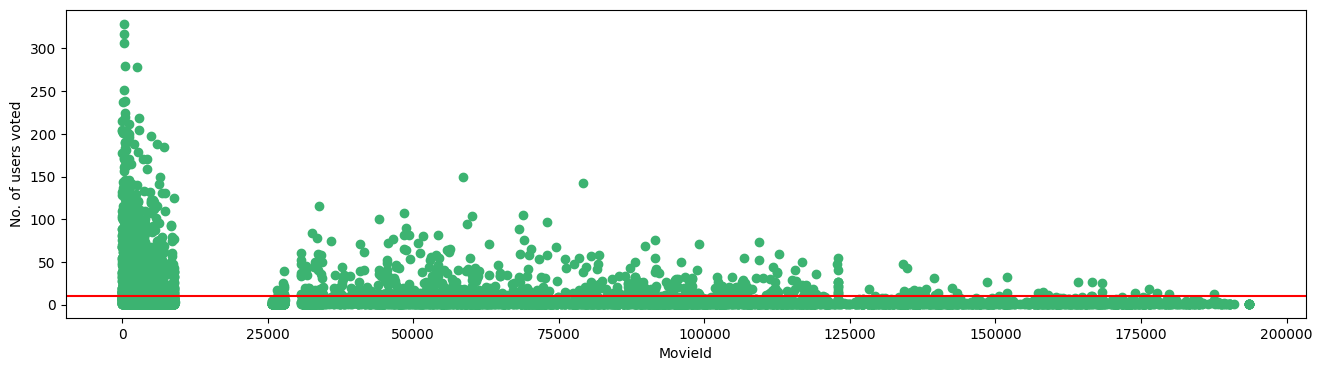

In [19]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [20]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

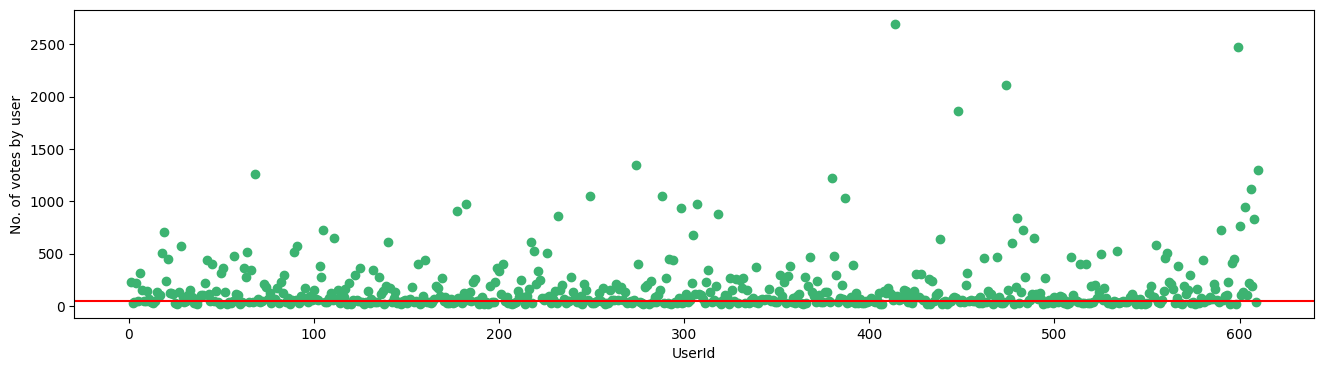

In [21]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [22]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
sparsity

0.7333333333333334

In [26]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [27]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [28]:
print(csr_data)

  (0, 0)	4.0
  (0, 3)	4.5
  (0, 6)	2.5
  (0, 8)	4.5
  (0, 9)	3.5
  (0, 10)	4.0
  (0, 12)	3.5
  (0, 16)	3.0
  (0, 19)	3.0
  (0, 20)	3.0
  (0, 25)	5.0
  (0, 28)	5.0
  (0, 29)	4.0
  (0, 31)	3.0
  (0, 34)	5.0
  (0, 38)	5.0
  (0, 39)	4.0
  (0, 40)	4.0
  (0, 41)	2.5
  (0, 43)	4.5
  (0, 46)	0.5
  (0, 47)	4.0
  (0, 50)	2.5
  (0, 53)	4.0
  (0, 55)	3.0
  :	:
  (2118, 205)	4.0
  (2118, 345)	1.5
  (2118, 357)	4.0
  (2118, 369)	4.5
  (2119, 37)	3.5
  (2119, 62)	3.0
  (2119, 98)	0.5
  (2119, 127)	4.5
  (2119, 156)	4.5
  (2119, 236)	0.5
  (2119, 256)	4.5
  (2119, 317)	2.0
  (2119, 345)	2.0
  (2119, 357)	5.0
  (2119, 365)	3.5
  (2120, 37)	4.0
  (2120, 62)	5.0
  (2120, 146)	2.5
  (2120, 155)	4.5
  (2120, 156)	5.0
  (2120, 186)	5.0
  (2120, 205)	4.0
  (2120, 236)	3.0
  (2120, 317)	3.5
  (2120, 357)	4.0


In [29]:
nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
nn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [30]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = nn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [31]:
get_movie_recommendation('Iron Man')

,Title,Distance
1,Up (2009),0.368857
2,Guardians of the Galaxy (2014),0.368758
3,Watchmen (2009),0.368558
4,Star Trek (2009),0.366029
5,Batman Begins (2005),0.362759
6,Avatar (2009),0.310893
7,Iron Man 2 (2010),0.307492
8,WALL·E (2008),0.298138
9,"Dark Knight, The (2008)",0.285835
10,"Avengers, The (2012)",0.285319


In [32]:
get_movie_recommendation('Inception')

,Title,Distance
1,"Hangover, The (2009)",0.369214
2,Iron Man (2008),0.369175
3,Fight Club (1999),0.367898
4,Sherlock Holmes (2009),0.366418
5,Django Unchained (2012),0.362976
6,Shutter Island (2010),0.345888
7,"Avengers, The (2012)",0.340302
8,"Dark Knight Rises, The (2012)",0.335075
9,Inglourious Basterds (2009),0.305288
10,"Dark Knight, The (2008)",0.213876


In [33]:
get_movie_recommendation('Shutter Island')

,Title,Distance
1,"Hurt Locker, The (2008)",0.464847
2,Interstellar (2014),0.458209
3,"Departed, The (2006)",0.451615
4,"Girl with the Dragon Tattoo, The (2011)",0.440004
5,"Wolf of Wall Street, The (2013)",0.428555
6,"Dark Knight Rises, The (2012)",0.425562
7,Inglourious Basterds (2009),0.413238
8,"Dark Knight, The (2008)",0.401175
9,"Hangover, The (2009)",0.388350
10,Inception (2010),0.345888


'No movies found. Please check your input'

# Content Based Filtering

In [49]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
metadata = pd.read_csv('movies_metadata.csv', low_memory = False)
metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [40]:
metadata[['original_title', 'overview']]

,original_title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...
45461,رگ خواب,Rising and falling between a man and woman.
45462,Siglo ng Pagluluwal,An artist struggles to finish his work while a...
45463,Betrayal,"When one of her hits goes wrong, a professiona..."
45464,Satana likuyushchiy,"In a small town live two brothers, one a minis..."


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

tfidf = TfidfVectorizer(stop_words='english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


In [52]:
# Function to convert nltk POS tag to a format recognized by WordNetLemmatizer
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function to lemmatize a given text
def lemmatize_text(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words if word.lower() not in stop_words]
    return ' '.join(lemmatized_words)

In [55]:
metadata['overview'] = metadata['overview'].fillna('')

metadata['overview'] = metadata['overview'].apply(lemmatize_text)

tfidf_matrix = tfidf.fit_transform(metadata['overview'])

tfidf_matrix.shape

(45466, 69157)

In [47]:
tfidf.get_feature_names_out()[1000: 1500]

array(['abdel', 'abdelatif', 'abdelhakim', 'abdelilah', 'abdelkader',
       'abdicate', 'abdicated', 'abdicates', 'abdicating', 'abdication',
       'abdominal', 'abdou', 'abdu', 'abduct', 'abducted', 'abductee',
       'abducting', 'abduction', 'abductions', 'abductor', 'abductors',
       'abducts', 'abdul', 'abdullah', 'abdurrahman', 'abe', 'abedin',
       'abednego', 'abel', 'abelardo', 'aber', 'abercrombie', 'aberdeen',
       'abernathy', 'aberrations', 'abetment', 'abetted', 'abeyance',
       'abgewinnen', 'abha', 'abhalten', 'abhi', 'abhigyan', 'abhinav',
       'abhiram', 'abhisek', 'abhishek', 'abhisheki', 'abhorred',
       'abhorrent', 'abhors', 'abhrush', 'abhyankar', 'abi', 'abide',
       'abides', 'abiding', 'abie', 'abiff', 'abigail', 'abilene',
       'abilities', 'ability', 'abira', 'abitbol', 'abitur', 'abject',
       'abkhazia', 'abkoude', 'ablai', 'ablaze', 'ablaï', 'able',
       'ableman', 'abler', 'ably', 'abner', 'abney', 'abnormal', 'abo',
       'aboard'

In [62]:
metadata['original_title'] = metadata['original_title'].apply(lambda x  : str(x).lower())

In [63]:
metadata['original_title'].head()

0                      toy story
1                        jumanji
2               grumpier old men
3              waiting to exhale
4    father of the bride part ii
Name: original_title, dtype: object

In [75]:
content_based_nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
content_based_nn.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [86]:
def get_recommendation(movie_name : str):
    n_movies_to_reccomend = 10
    movie_list = metadata[metadata['original_title'].str.contains(movie_name.lower())]
    if len(movie_list):
        movie_idx= movie_list.index[0]
        movie_tfidf = tfidf_matrix[movie_idx]
        distances , indices = content_based_nn.kneighbors(movie_tfidf,n_neighbors=n_movies_to_reccomend+1)

        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie = metadata.loc[val[0]]
            recommend_frame.append({'Title':movie['original_title'],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [88]:
get_recommendation("batman")

,Title,Distance
1,batman returns,0.779328
2,batman: under the red hood,0.777646
3,batman begins,0.770645
4,batman: mask of the phantasm,0.764384
5,the dark knight,0.755136
6,"batman: the dark knight returns, part 1",0.748494
7,batman: return of the caped crusaders,0.747355
8,batman: bad blood,0.736244
9,batman beyond darwyn cooke's batman 75th anniv...,0.714358
10,the dark knight rises,0.676430


In [89]:
get_recommendation("terminator")

,Title,Distance
1,the covenant,0.828190
2,respire,0.821690
3,silent house,0.816714
4,elle s'appelait sarah,0.809101
5,loin,0.809014
6,terminator salvation,0.785110
7,the terminators,0.762673
8,terminator 3: rise of the machines,0.747638
9,terminator genisys,0.719816
10,the terminator,0.677719
